Spróbujemy zrozumieć SVD (przynajmniej geometrycznie). 

Na początek zobaczmy co to jest rozkład SVD.

In [30]:
# Singular-value decomposition
import numpy as np
from scipy.linalg import svd
from scipy.linalg import inv
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print("A:\n", A)

U, s, VT = svd(A)

print("U:\n", U)
S = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:A.shape[1], :A.shape[1]] = np.diag(s)
print("S\n", S)
print("V^T:\n", VT)

A:
 [[1 2]
 [3 4]
 [5 6]]
U:
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
S
 [[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]
V^T:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


Powstałe macierz pozwalają na rekonstrukcję oryginalnej macierzy w następujący sposób:
$$
A = U S V^T
$$
gdzie $S$ to macierz diagonalna z wyrazami $s$ na przekątnej. Wymiar $S$ jest taki jak wymiar macierzy $A$. Zobacz: https://en.wikipedia.org/wiki/Singular-value_decomposition dla ilustracji.

Proszę sprawdzić, że iloczyn tych macierzy rzeczywiście daje wyjściową macierz.

In [5]:
S = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:A.shape[1], :A.shape[1]] = np.diag(s)
# reconstruct matrix
B = U.dot(S.dot(VT))
print(B)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Wyrazy $s$ to wartości singularne i są one powiązane z wartościami własnymi macierzy kowaiancji, a kolumny $V$ to wektory własne.

Żeby zrozumieć co robi SVD, trzeba zdać sobie sprawę z tego że macierz to odwzorowanie liniowe. Każde odwzorowanie liniowe można przedstawić w postaci złożenia 3 odwzorowań: obrotu, skalowania, obrotu - to jest właśnie rozkład SVD. Jak wyglądają te odwzorowania zobrazujemy sobie na przykładzie 2D.

Potrzebne nam będą pomocnicze funkcje do rysowania.


In [16]:
import matplotlib.pyplot as plt

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)
        
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)


Bierzemy macierz 2 na 2. W języku danych są to dwa punkty na płaszczyżnie a w języku funkcji to odwzorowanie liniowe wektora z płaszczyzny na płaszczyznę. Pokażemy jak wektory bazowe (osie układu) zmieniają się pod wpływem tego odzworowania.

Bierzemy wektor $x = [x_1 x_2]$. Macierz $A$ działa na tym wektorze jako $y = A x$ - to produkuje nowy wektor $y = [y_1 y_2]$

Unit circle:


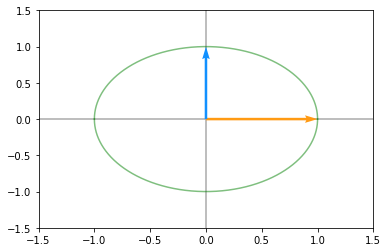

Unit circle transformed by A:


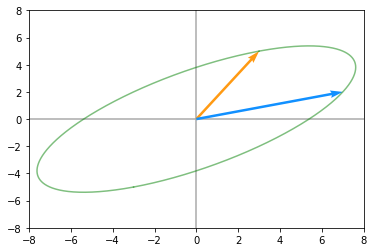

In [25]:
A = np.array([[3, 7], [5, 2]])

print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Dokonujemy rozkładu SVD:

In [26]:
U, D, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [27]:
D

array([8.71337969, 3.32821489])

In [28]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

Pokażemy teraz jak nasz bazowy okrąg zmienia się pod wpływem składowych transformacji

Unit circle:


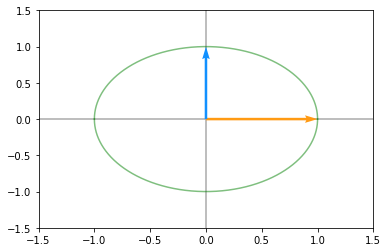

First rotation:


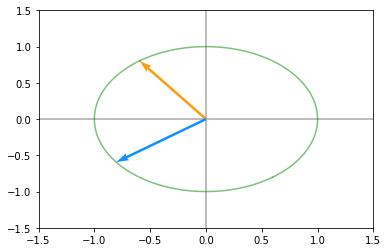

Scaling:


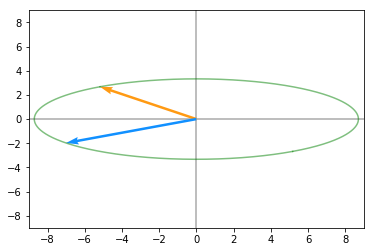

Second rotation:


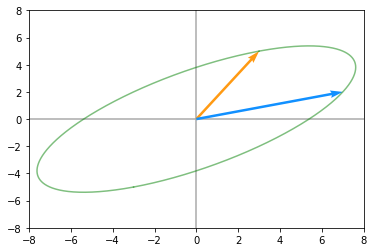

In [29]:
# Unit circle
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Transformacja SVD działa na dowolnych (niekwadratowych) macierzach.

W języku danych, szukamy 2 obrotów i skalowania, które przekształcają dane z kuli do naszego zbioru danych. 

Pokażmy ścisły związek z rozkładem na wartości i wektory własne. Zakładamy, że nasze dane są przesunięte do zera (wyśrodkowane). Wtedy 
<ul>
<li> $U$ odpowiada wektorom własnym $A A^T$</li>
<li> $V$ odpowiada wektorom własnym $A^T A$ (macierzy kowariancji)</li>
<li> $S$ to pierwiastkowi z wartości własnych $A^T A$</li>
</ul>
Proszę to sprawdzić

Przypomnijmy że SVD to:
$$
X = U S V^T.
$$
Macierze $U$ i $V$ są ortogonalne, więc mnożąc z prawej strony przez $V$ dostajemy:
$$
XV = US.
$$

Jeśli redukujemy dane $X$ do $k$ wymiarów za pomocą SVD to rzutujemy na podprzestrzeń rozpiętą przez $V_k = (v_1,\ldots,v_k)$, czyli mnożymy $X V_k$. Jest to to samo co $U_k S_k$. Dostajemy przedstawienie każdego wektora danych za pomocą $k$ wektorów własnych. Wektory własne to takie nowe wektory bazowe, które biorą trochę z oryginalnych współrzędnych (topici, które są kombinacją słów w nlp).  Jeśli potraktujemy $V_k$ jako nowy układ współrzędnych to mamy redukcję do $k$ wymiarów.

Jeśli chcemy teraz odtworzyć (stratnie) nasze dane to wykorzystujemy:
$$
X = U_k S_k (V^T)_k.
$$
Skoro zredukowane dane to $U_k S_k$, to mnożymy je z prawej przez $(V^T)_k$.

W TruncatedSVD, components to $V_k$, explained variance jest powiązane z $S$ ale to nie do końca to....

Mówiliśmy, że oryginalna macierz może zostać odtworzona z rozkładu SVD. Ciekawsze z naszego punktu widzenia jest to że dane można zapisać używając mniejszej ilości komponentów (wektorów własnych macierzy kowariancji), czyli skompresować, a później odtworzyć w sposób stratny. Dokładniej bierzemy dane wymiaru $D=100$ i chcemy zredukować do wymiary $k=10$. Rozkład SVD daje nam przepis jak wrócić z wymiaru $k$ do wymiaru $D$ (ale stratnie).  Mianowicie trzeba wziąć:
<ul>
<li> $k$ wierszy $V^T$</li>
<li> podmacierz $S$ wymiaru $k$ na $k$</li>
<li> $k$ kolumn $U$</li>
</ul>
i pomnożyć ze sobą. Zobacz na mnożenie macierzy SVD na wikipedii: https://en.wikipedia.org/wiki/Singular-value_decomposition

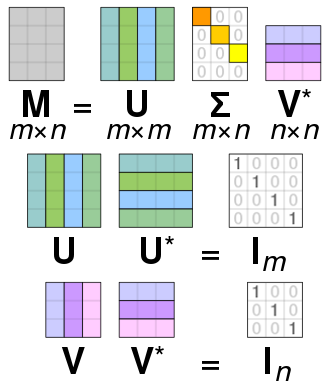

In [36]:
#bierzemy dane które opisują prostą w 2D

A = np.array([
	[1,2,3,4,5,6,7,8,9,10],
	[11,12,13,14,15,16,17,18,19,20],
	[21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
n_elements = 2
reconstimg = np.matrix(U[:, :n_elements]) * np.diag(s[:n_elements]) * np.matrix(VT[:n_elements, :])
print(reconstimg)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]]


Skoro dane leżą na prostej to jeden kierunek wystarcza do ich opisu. Nie zawsze tak jest - wówczas będzie strata w odtworzeniu.

Może lepiej więcej wymiarowe dane wziąć, odzyskać i zapytać się ich dlaczego odzykalismy dokładnie (bo były zależne - leżały na jednej płaszczyźnie):)

Pobawimy się kompresją za chwilę

In [ ]:
A = np.array([
	[1,2,3,4,5,6,7,8,9,10],
	[2,4,6,8,10,12,14,16,18,20]])